In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes_dataset.csv


In [35]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes_dataset.csv')

In [36]:
df

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

In [38]:
print(df.isnull().sum())

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64


In [39]:
print(df.describe())  

               Age  Pregnancies          BMI      Glucose  BloodPressure  \
count  9538.000000  9538.000000  9538.000000  9538.000000    9538.000000   
mean     53.577584     7.986161    27.052364   106.104183      84.475781   
std      20.764651     4.933469     5.927955    21.918590      14.123480   
min      18.000000     0.000000    15.000000    50.000000      60.000000   
25%      36.000000     4.000000    22.870000    91.000000      74.000000   
50%      53.000000     8.000000    27.050000   106.000000      84.000000   
75%      72.000000    12.000000    31.180000   121.000000      94.000000   
max      89.000000    16.000000    49.660000   207.200000     138.000000   

             HbA1c          LDL          HDL  Triglycerides  \
count  9538.000000  9538.000000  9538.000000    9538.000000   
mean      4.650661   100.133456    49.953418     151.147746   
std       0.476395    29.911910    15.242194      48.951627   
min       4.000000   -12.000000    -9.200000      50.000000   


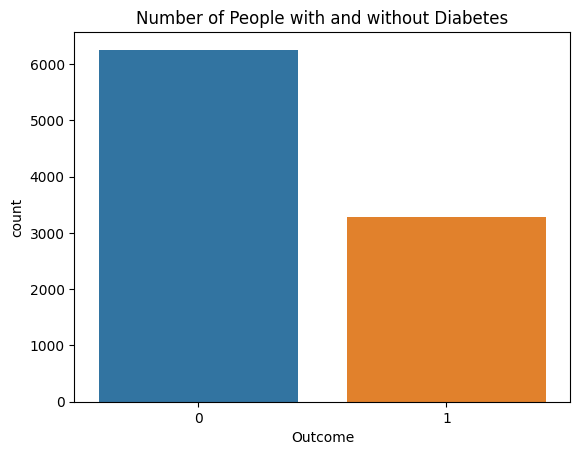

In [40]:
sns.countplot(x="Outcome", data=df)
plt.title("Number of People with and without Diabetes")
plt.show()


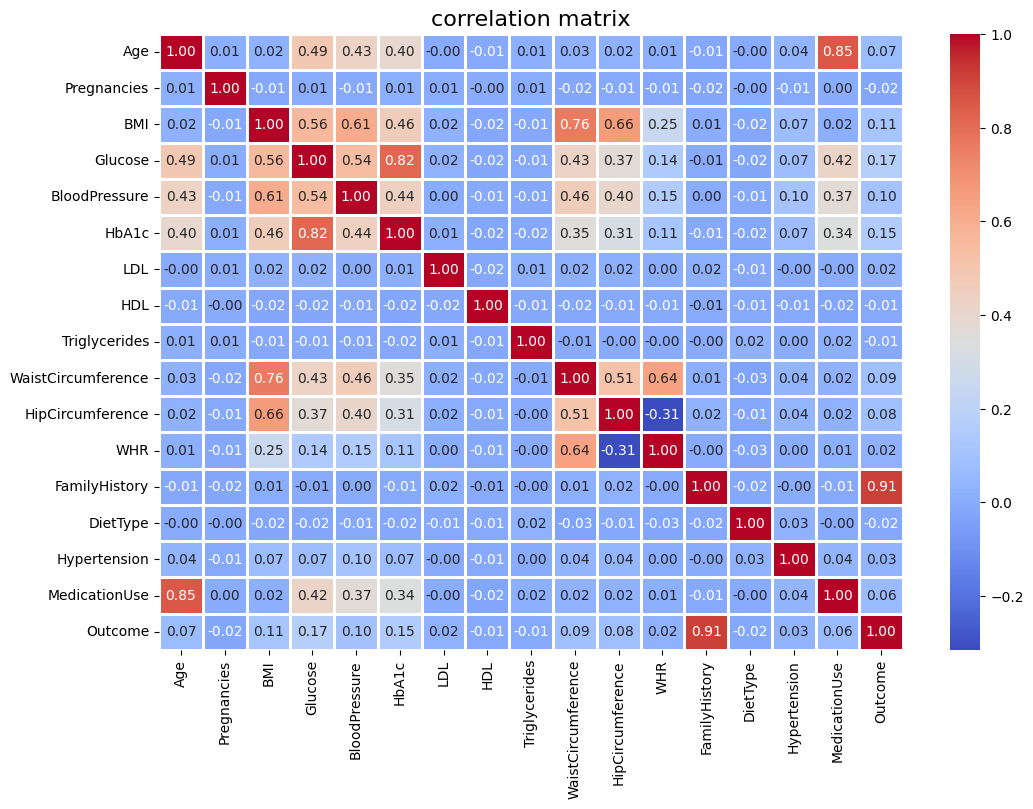

In [41]:
plt.figure(figsize=(12,8))  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("correlation matrix", fontsize=16)  
plt.show()


In [109]:
columns_to_drop = [
    "Pregnancies", 
    "LDL", 
    "HDL", 
    "Triglycerides", 
    "DietType", 
    "Hypertension", 
    "MedicationUse", 
    "HipCircumference",  

]

df_cleaned = df.drop(columns=columns_to_drop)

print("new dataset columns:", df_cleaned.columns)


new dataset columns: Index(['Age', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'WaistCircumference',
       'WHR', 'FamilyHistory', 'Outcome'],
      dtype='object')


In [110]:
df_cleaned

,Age,BMI,Glucose,BloodPressure,HbA1c,WaistCircumference,WHR,FamilyHistory,Outcome
0,69,28.39,130.1,77.0,5.4,90.5,0.84,0,0
1,32,26.49,116.5,72.0,4.5,113.3,1.39,0,0
2,89,25.34,101.0,82.0,4.9,84.7,0.79,0,0
3,78,29.91,146.0,104.0,5.7,108.9,0.99,0,1
4,38,24.56,103.2,74.0,4.7,84.1,0.91,0,0
...,...,...,...,...,...,...,...,...,...
9533,32,23.00,102.3,62.0,4.1,86.8,0.75,0,0
9534,74,24.29,125.8,93.0,5.3,90.1,0.96,1,1
9535,75,26.10,107.6,75.0,5.0,84.0,0.73,0,0
9536,52,25.88,99.3,96.0,4.6,97.5,1.10,1,1


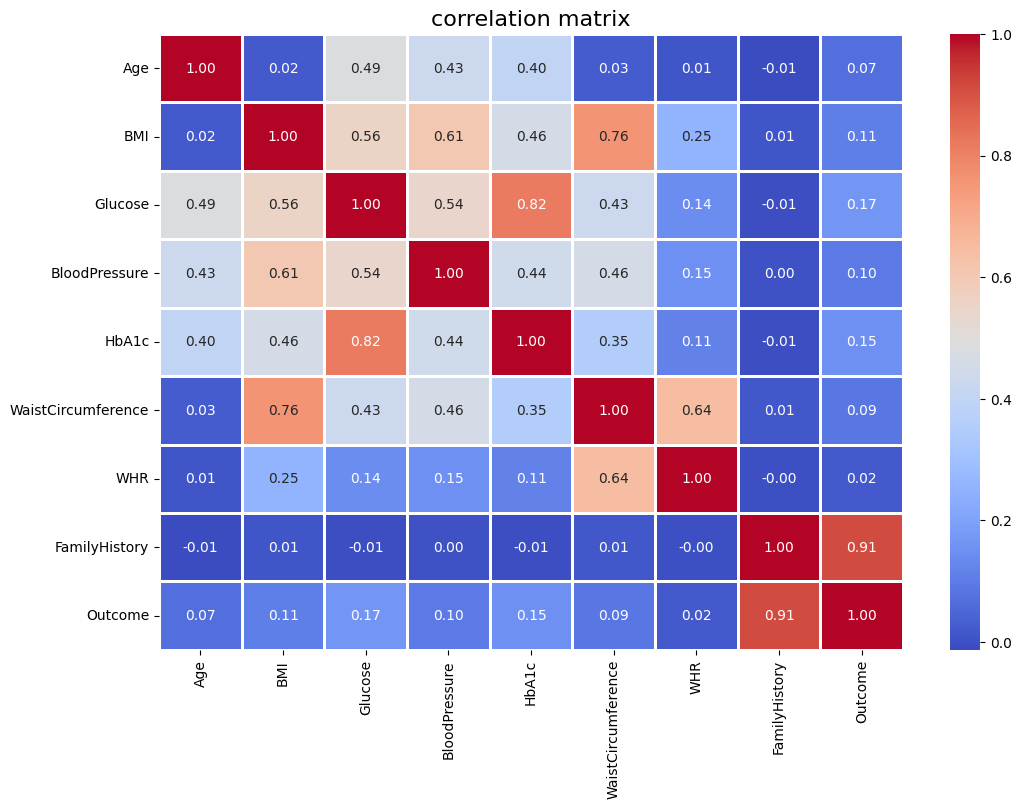

In [111]:
plt.figure(figsize=(12,8))  
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("correlation matrix", fontsize=16)  
plt.show()


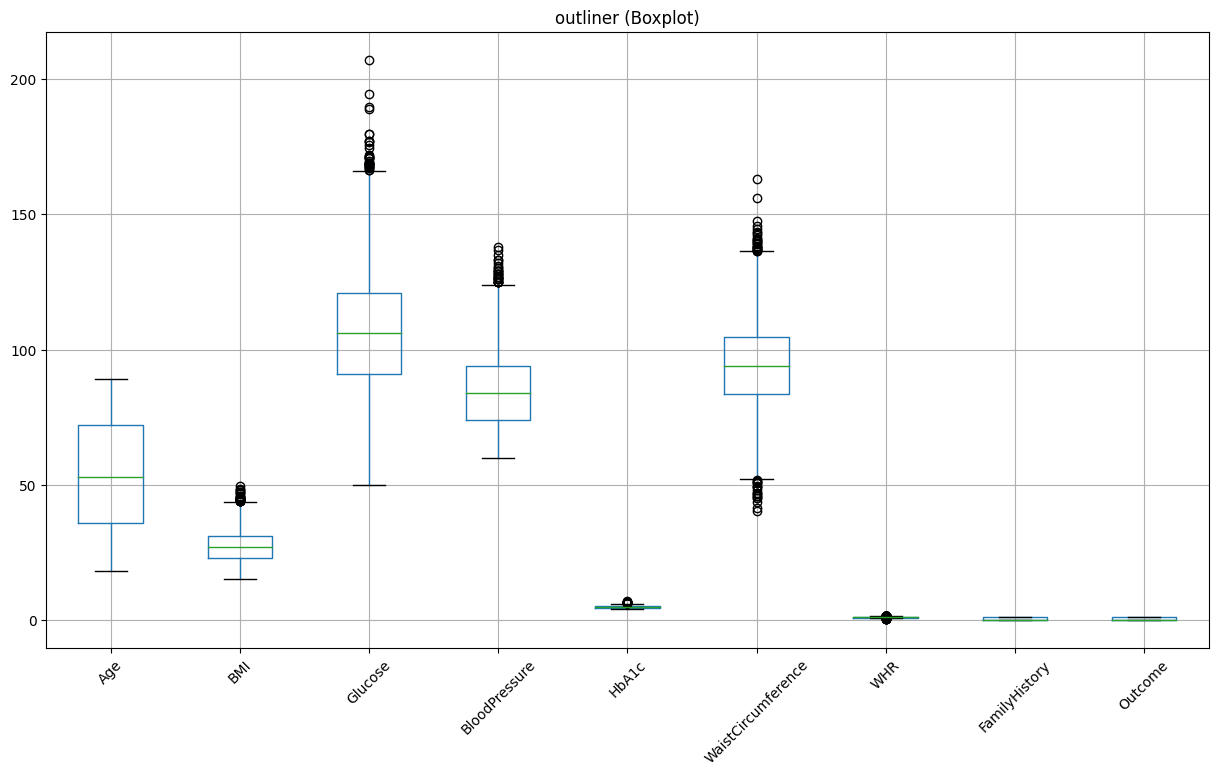

In [112]:
plt.figure(figsize=(15,8))
df_cleaned.boxplot(rot=45)  
plt.title("outliner (Boxplot)")
plt.show()


In [113]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: {len(outliers)} outlier found")


Age: 0 outlier found
BMI: 29 outlier found
Glucose: 34 outlier found
BloodPressure: 30 outlier found
HbA1c: 31 outlier found
WaistCircumference: 46 outlier found
WHR: 87 outlier found
FamilyHistory: 0 outlier found
Outcome: 0 outlier found


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

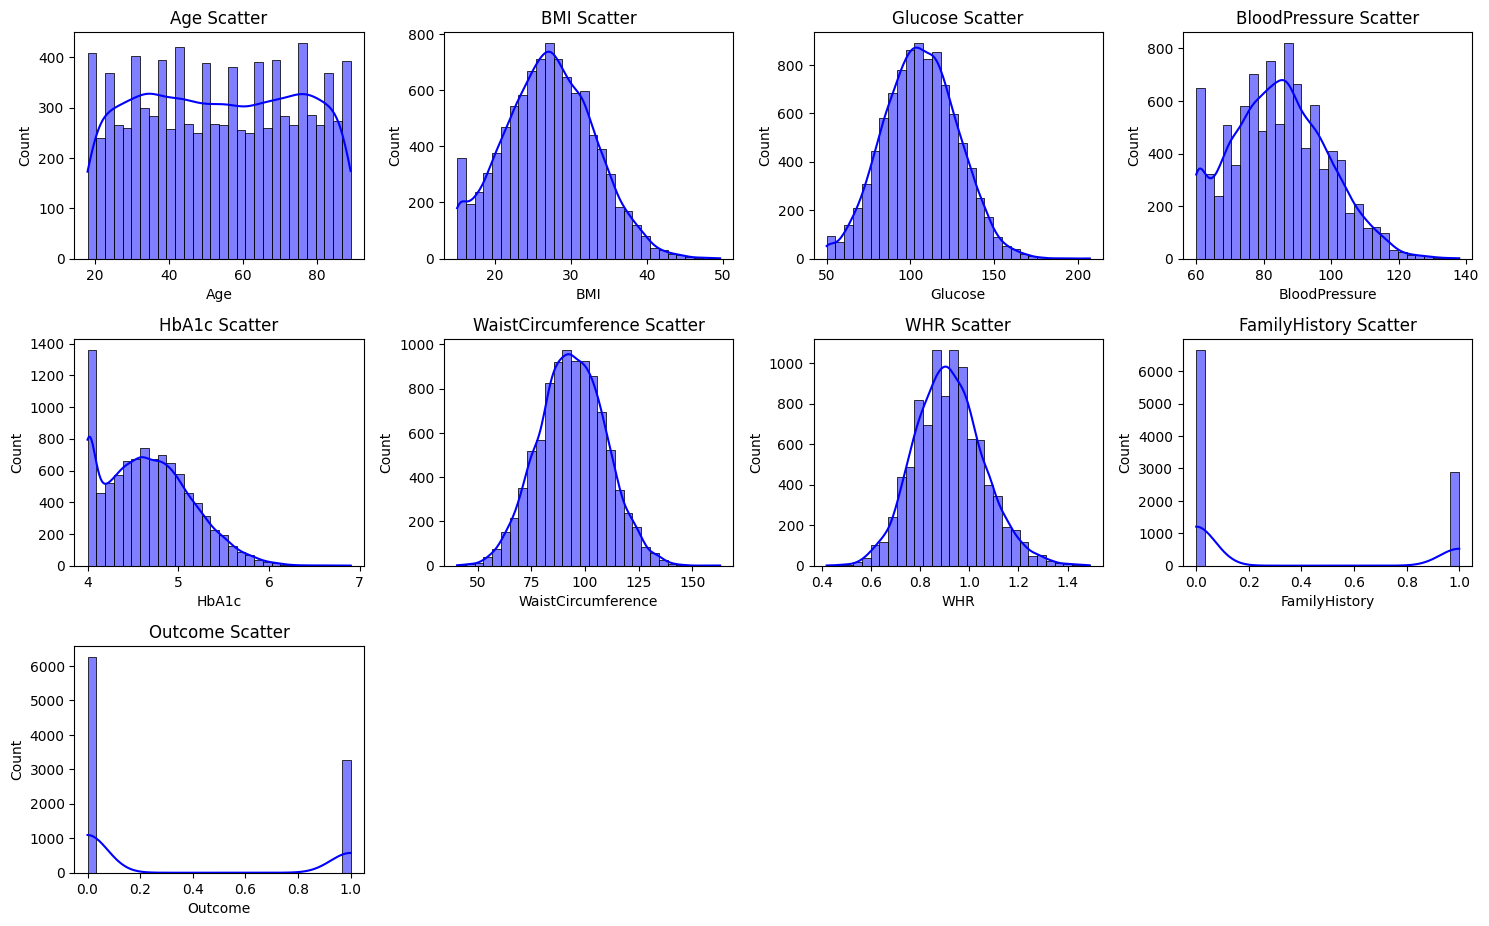

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,12))

for i, column in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(df_cleaned[column], kde=True, bins=30, color="blue") 
    plt.title(f"{column} Scatter")

plt.tight_layout()
plt.show()


In [115]:
df_cleaned["HbA1c_Log"] = np.log1p(df_cleaned["HbA1c"])
df_cleaned["BloodPressure_Log"] = np.log1p(df_cleaned["BloodPressure"])


In [116]:
df_cleaned["Age_Group"] = pd.cut(df_cleaned["Age"], bins=[0, 30, 50, 100], labels=["Young", "Middle-aged", "Old"])

In [117]:
df_cleaned

,Age,BMI,Glucose,BloodPressure,HbA1c,WaistCircumference,WHR,FamilyHistory,Outcome,HbA1c_Log,BloodPressure_Log,Age_Group
0,69,28.39,130.1,77.0,5.4,90.5,0.84,0,0,1.856298,4.356709,Old
1,32,26.49,116.5,72.0,4.5,113.3,1.39,0,0,1.704748,4.290459,Middle-aged
2,89,25.34,101.0,82.0,4.9,84.7,0.79,0,0,1.774952,4.418841,Old
3,78,29.91,146.0,104.0,5.7,108.9,0.99,0,1,1.902108,4.653960,Old
4,38,24.56,103.2,74.0,4.7,84.1,0.91,0,0,1.740466,4.317488,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,23.00,102.3,62.0,4.1,86.8,0.75,0,0,1.629241,4.143135,Middle-aged
9534,74,24.29,125.8,93.0,5.3,90.1,0.96,1,1,1.840550,4.543295,Old
9535,75,26.10,107.6,75.0,5.0,84.0,0.73,0,0,1.791759,4.330733,Old
9536,52,25.88,99.3,96.0,4.6,97.5,1.10,1,1,1.722767,4.574711,Old


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

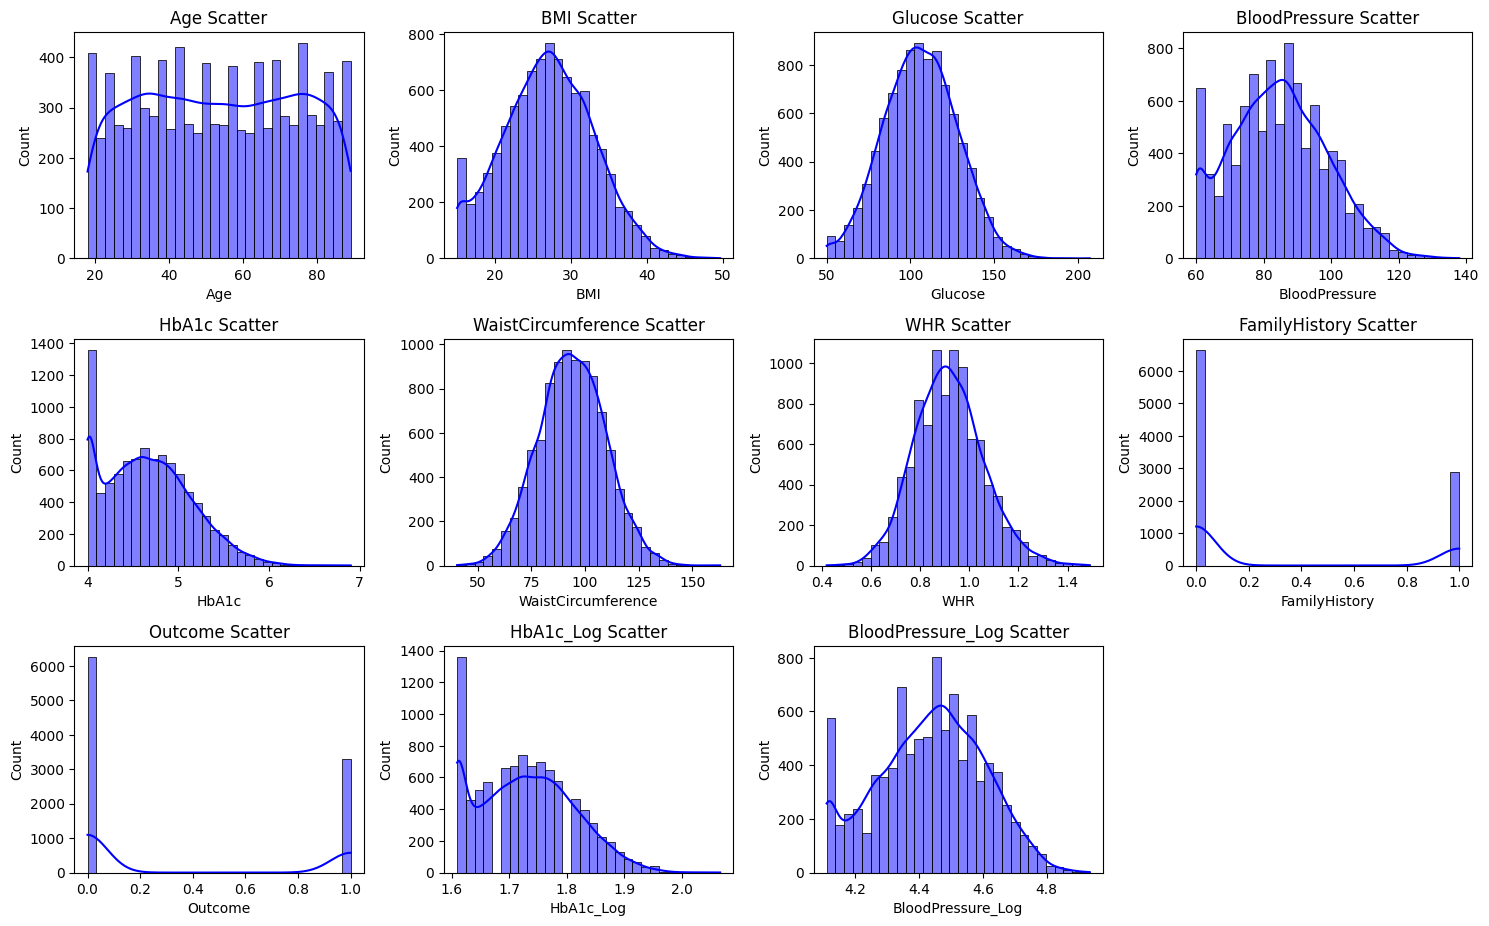

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,12))

for i, column in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(df_cleaned[column], kde=True, bins=30, color="blue") 
    plt.title(f"{column} Scatter")

plt.tight_layout()
plt.show()


In [119]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: {len(outliers)} outlier found")


Age: 0 outlier found
BMI: 29 outlier found
Glucose: 34 outlier found
BloodPressure: 30 outlier found
HbA1c: 31 outlier found
WaistCircumference: 46 outlier found
WHR: 87 outlier found
FamilyHistory: 0 outlier found
Outcome: 0 outlier found
HbA1c_Log: 9 outlier found
BloodPressure_Log: 3 outlier found


In [120]:
def replace_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

replace_outliers_with_median(df_cleaned, "WaistCircumference")
replace_outliers_with_median(df_cleaned, "WHR")


In [121]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25) 
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(df_cleaned, col)
    print(f"{col}: {len(outliers)} outlier found")


Age: 0 outlier found
BMI: 29 outlier found
Glucose: 34 outlier found
BloodPressure: 30 outlier found
HbA1c: 31 outlier found
WaistCircumference: 2 outlier found
WHR: 38 outlier found
FamilyHistory: 0 outlier found
Outcome: 0 outlier found
HbA1c_Log: 9 outlier found
BloodPressure_Log: 3 outlier found


In [122]:
df_cleaned

,Age,BMI,Glucose,BloodPressure,HbA1c,WaistCircumference,WHR,FamilyHistory,Outcome,HbA1c_Log,BloodPressure_Log,Age_Group
0,69,28.39,130.1,77.0,5.4,90.5,0.84,0,0,1.856298,4.356709,Old
1,32,26.49,116.5,72.0,4.5,113.3,0.91,0,0,1.704748,4.290459,Middle-aged
2,89,25.34,101.0,82.0,4.9,84.7,0.79,0,0,1.774952,4.418841,Old
3,78,29.91,146.0,104.0,5.7,108.9,0.99,0,1,1.902108,4.653960,Old
4,38,24.56,103.2,74.0,4.7,84.1,0.91,0,0,1.740466,4.317488,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,23.00,102.3,62.0,4.1,86.8,0.75,0,0,1.629241,4.143135,Middle-aged
9534,74,24.29,125.8,93.0,5.3,90.1,0.96,1,1,1.840550,4.543295,Old
9535,75,26.10,107.6,75.0,5.0,84.0,0.73,0,0,1.791759,4.330733,Old
9536,52,25.88,99.3,96.0,4.6,97.5,1.10,1,1,1.722767,4.574711,Old


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


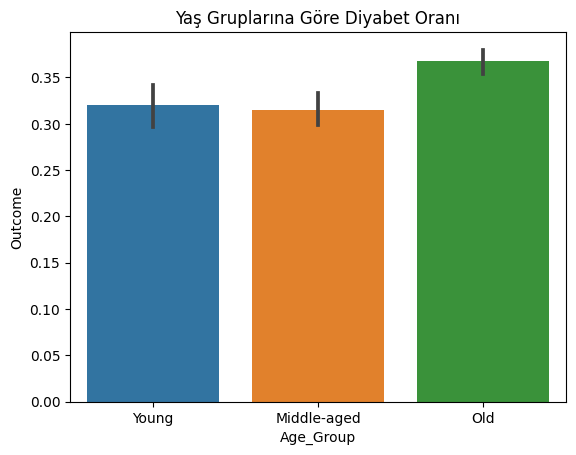

In [123]:
sns.barplot(x="Age_Group", y="Outcome", data=df_cleaned)
plt.title("Diabetes Rate by Age Groups")
plt.show()


In [124]:
df_cleaned.drop(columns=["HbA1c", "BloodPressure", "Age"], inplace=True)  

In [125]:
df_cleaned = pd.get_dummies(df_cleaned, columns=["Age_Group"], drop_first=True)

In [126]:
df_cleaned

,BMI,Glucose,WaistCircumference,WHR,FamilyHistory,Outcome,HbA1c_Log,BloodPressure_Log,Age_Group_Middle-aged,Age_Group_Old
0,28.39,130.1,90.5,0.84,0,0,1.856298,4.356709,False,True
1,26.49,116.5,113.3,0.91,0,0,1.704748,4.290459,True,False
2,25.34,101.0,84.7,0.79,0,0,1.774952,4.418841,False,True
3,29.91,146.0,108.9,0.99,0,1,1.902108,4.653960,False,True
4,24.56,103.2,84.1,0.91,0,0,1.740466,4.317488,True,False
...,...,...,...,...,...,...,...,...,...,...
9533,23.00,102.3,86.8,0.75,0,0,1.629241,4.143135,True,False
9534,24.29,125.8,90.1,0.96,1,1,1.840550,4.543295,False,True
9535,26.10,107.6,84.0,0.73,0,0,1.791759,4.330733,False,True
9536,25.88,99.3,97.5,1.10,1,1,1.722767,4.574711,False,True


In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BMI                    9538 non-null   float64
 1   Glucose                9538 non-null   float64
 2   WaistCircumference     9538 non-null   float64
 3   WHR                    9538 non-null   float64
 4   FamilyHistory          9538 non-null   int64  
 5   Outcome                9538 non-null   int64  
 6   HbA1c_Log              9538 non-null   float64
 7   BloodPressure_Log      9538 non-null   float64
 8   Age_Group_Middle-aged  9538 non-null   bool   
 9   Age_Group_Old          9538 non-null   bool   
dtypes: bool(2), float64(6), int64(2)
memory usage: 614.9 KB


In [128]:
df_cleaned["Age_Group_Middle-aged"] = df_cleaned["Age_Group_Middle-aged"].astype(int)
df_cleaned["Age_Group_Old"] = df_cleaned["Age_Group_Old"].astype(int)


In [129]:
df_cleaned

,BMI,Glucose,WaistCircumference,WHR,FamilyHistory,Outcome,HbA1c_Log,BloodPressure_Log,Age_Group_Middle-aged,Age_Group_Old
0,28.39,130.1,90.5,0.84,0,0,1.856298,4.356709,0,1
1,26.49,116.5,113.3,0.91,0,0,1.704748,4.290459,1,0
2,25.34,101.0,84.7,0.79,0,0,1.774952,4.418841,0,1
3,29.91,146.0,108.9,0.99,0,1,1.902108,4.653960,0,1
4,24.56,103.2,84.1,0.91,0,0,1.740466,4.317488,1,0
...,...,...,...,...,...,...,...,...,...,...
9533,23.00,102.3,86.8,0.75,0,0,1.629241,4.143135,1,0
9534,24.29,125.8,90.1,0.96,1,1,1.840550,4.543295,0,1
9535,26.10,107.6,84.0,0.73,0,0,1.791759,4.330733,0,1
9536,25.88,99.3,97.5,1.10,1,1,1.722767,4.574711,0,1


In [141]:
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=["Outcome"])  
y = df_cleaned["Outcome"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

log_accuracy = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

print(f"Logisctic Regression - Accuracy: {log_accuracy:.4f}, F1 Score: {log_f1:.4f}")


Logisctic Regression - Accuracy: 0.9916, F1 Score: 0.9872


In [143]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, F1 Score: {xgb_f1:.4f}")


XGBoost - Accuracy: 0.9984, F1 Score: 0.9976


In [144]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print(f"SVM - Accuracy: {svm_accuracy:.4f}, F1 Score: {svm_f1:.4f}")


SVM - Accuracy: 0.9927, F1 Score: 0.9888


In [145]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

print(f"KNN - Accuracy: {knn_accuracy:.4f}, F1 Score: {knn_f1:.4f}")


KNN - Accuracy: 0.9827, F1 Score: 0.9737


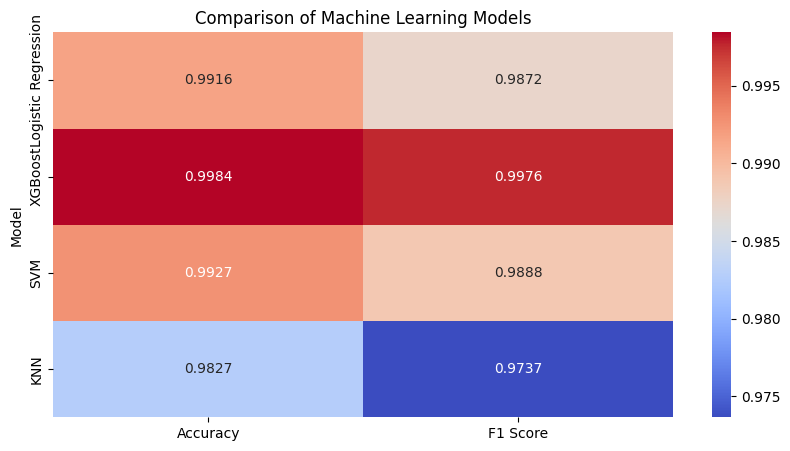

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "XGBoost", "SVM", "KNN"],
    "Accuracy": [log_accuracy, xgb_accuracy, svm_accuracy, knn_accuracy],
    "F1 Score": [log_f1, xgb_f1, svm_f1, knn_f1]
})

plt.figure(figsize=(10,5))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Comparison of Machine Learning Models")
plt.show()



In [153]:
import joblib

joblib.dump(svm_model, "svm_model.pkl")


['svm_model.pkl']